## SEC Serialization
public key(S256Point) 是椭圆曲线上的一个点，序列化的标准为SEC（Standard for Efficient Cryptography），SEC有两种格式：压缩和非压缩。
### Uncompressed
1. prefix 0x04
2. x轴，32字节，大端
3. y轴，32字节，大端
### Compressed
1. prefix 0x02(y为偶数)|0x03(y为奇数)
2. x轴，32字节，大端
对于给定的x，满足y和p-y在椭圆曲线上。p是一个大于2的质数，所以p是奇数，所以y和p-y一奇一偶。
## DER Signatures
1. prefix 0x30
2. length of rest
3. 0x02
4. r的长度，r, 大端，如果第一个字节大于0x80，则添加前缀0x00
5. 0x02
6. s的长度，s，大端，如果第一个字节大于0x80，则添加前缀0x00

0x30|长度|0x02|r的长度|0x00（如果r的第一个字节大于0x80）+r|0x02|s的长度|0x00（如果s的第一个字节大约0x80）|s

## Address
1. prefix 0x00(mainnet), 0x6f(testnet)
2. hash160(SEC)
3. #1+#2
4. hash160(#3) 取前4个字节
5. base58（#3+4）
## WIF Format
1. prefix 0x80(mainnet), 0xef(testnet)
2. secret key 大端存储
3. 如果pub key 的SEC是compressed，添加后缀0x01
4. #1|#2|#3
5. encode_base58_checksum(#4)

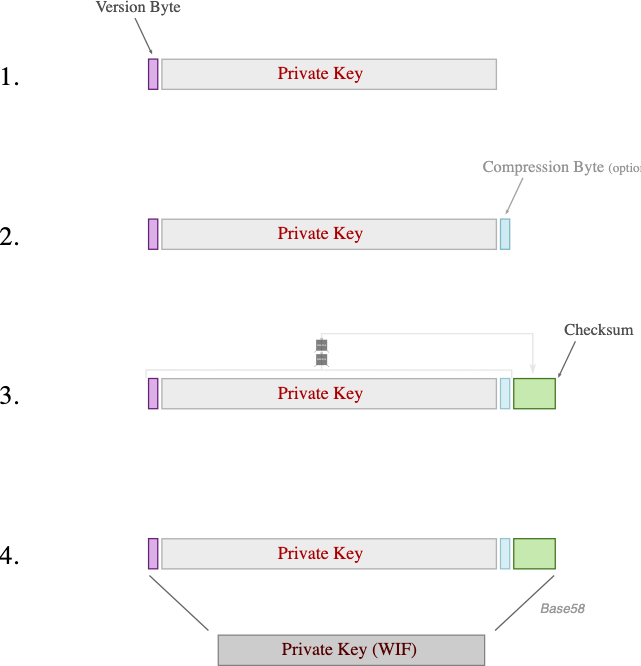
